Author:AAYUSH VOHRA


From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

K- Means Clustering with Scikit Learn

K-Means Clustering comes under Non-Hierarchial Clustering and it is a partition based clustering, the objective of K-means is simple: group similar data points together and discover underlying patterns.


K-means algorithm starts with randomly selected centroids, which are used as beginning points for every cluster, and then performs iterative calculations to optimize the positions of the centroid. It's stops optimizing the position of the centroids in two cases: (1) when the centroids have stabilized(there is no change in their values because the clustering has been sucessful.) (2) when predefined number of iterations has been achieved.


In K-means clustering there is no dendogram we will upfront find the number of clusters using screeplot or elbow curve.


K-means clustering will perform well when we have large dataset and this algorithm will get influenced by noise and outliers in the dataset to overcome that we use K-medians or K-medoids

Step-1 importing libaries

Here, i am going to import all libraries which are required to implement this task. 

Step-1 importing libaries

Here, i am going to import all libraries which are required to implement this task.

In [1]:
#importing all libraries 
import pandas as pd # This library is used convert my dataset to dataframe.
import numpy as np # Numpy library is used to do numerical calculations.
import matplotlib.pyplot as plt # This library is used to for visualizations.
import seaborn as sns # This is advanced visualization library.

Step-2 Reading dataset

Here I am going to read my dataset from sklearn.dataset and my dataset is Iris dataset, sklearn have many inbuilt dataset we use them using single line command. after importing dataset i will view top 5 rows.

In [2]:
from sklearn import datasets
iris = datasets.load_iris() # Here i am  loading my iris data from sklearn dataset
iris = pd.DataFrame(iris.data, columns=iris.feature_names) # Here i am converting my data into dataframe
iris.head() # By using this command we will view top 5 rows in iris dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Step-3 Data Preprocessing

Here, I am checking for null values in the dataset using following command.

In [3]:

iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

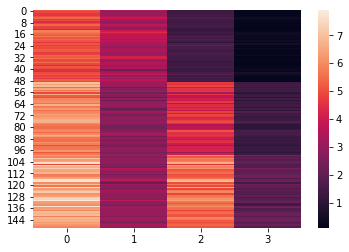

In [4]:
x = iris.iloc[:, [0, 1, 2, 3]].values
sns.heatmap(x)


In [5]:

# Finding the optimum number of clusters for k-means classification

from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',max_iter = 300, n_init = 10,random_state = 5)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

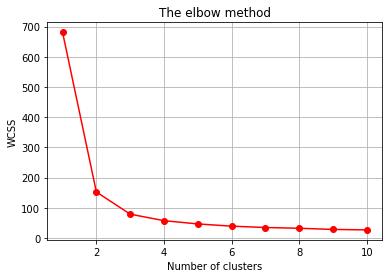

In [6]:
# Plotting the results onto a line graph, to observe The elbow curve.
plt.grid()
plt.plot(range(1, 11), wcss,'ro-')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()


Step-4 Applying K-Means Clustering Algorithm to the iris dataset with number of clusters = 3

In [7]:
# Applying kmeans to the dataset with optimum number of clusters

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 200, n_init = 10, random_state = 0)
out_kmeans = kmeans.fit_predict(x)
out_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

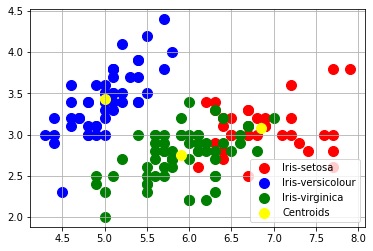

In [8]:
# Visualising the clusters - On the first two columns
plt.grid()
plt.scatter(x[out_kmeans == 0, 0], x[out_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[out_kmeans == 1, 0], x[out_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[out_kmeans == 2, 0], x[out_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [9]:
m = pd.Series(kmeans.labels_)
iris['clust']=m

In [10]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clust
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [11]:
iris = iris.iloc[:,[4,0,1,2,3]]
iris.head()

,clust,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,1,5.1,3.5,1.4,0.2
1,1,4.9,3.0,1.4,0.2
2,1,4.7,3.2,1.3,0.2
3,1,4.6,3.1,1.5,0.2
4,1,5.0,3.6,1.4,0.2


In [12]:
iris.iloc[:,:].groupby(iris.clust).mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
clust,,,,
0,6.850000,3.073684,5.742105,2.071053
1,5.006000,3.428000,1.462000,0.246000
2,5.901613,2.748387,4.393548,1.433871
